<a href="https://colab.research.google.com/github/dhairya20/CS6375_Linear_Regression_using_Gradient_Descent/blob/main/Part01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CS 6375 - Assignment 1 - Part1 - Linear Regression using Gradient Descent**

Submitted by Dhairya Desai(DPD140130)

In [ ]:
# Information about the project
'''
Dataset Owner/Donor Information:
Real estate valuation data set. (2018). UCI Machine Learning Repository. https://doi.org/10.24432/C5J30W.

Dataset Information:
The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. The real estate valuation is a regression problem. The data set was randomly split into the training data set (2/3 samples) and the testing data set (1/3 samples).

Target Variable:
Y = House price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

References:
1) https://scikit-learn.org/stable/modules/classes.html
2) https://numpy.org/doc/stable/reference/
3) https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set
4) https://www.kaggle.com/dskagglemt/real-estate-valuation-using-linearsvr
5) https://medium.com/@powusu381/multiple-regression-in-python-using-scikit-learn-predicting-the-miles-per-gallon-mpg-of-cars-4c8e512234be
6) https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
'''

**Import Libraries**

In [ ]:
# Library Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as matplt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
%matplotlib inline

**Loading Dataset**

In [ ]:
# Dataset Loading
df = pd.read_csv('https://raw.githubusercontent.com/dhairya20/CS6375_Linear_Regression_using_Gradient_Descent/main/Dataset.csv')

print("Data Loaded Successfully")
print("Real Estate Valuation Data Set has {} data points with {} variables each.".format(*df.shape))

Data Loaded Successfully
Real Estate Valuation Data Set has 414 data points with 8 variables each.


**Pre-Processing Dataset**

In [ ]:
# Pre-Processing Stage
print("Pre-Processing the Data:\n")

# Check for null values
#print("Null entries found?:", ("No\n" if dataframe.isnull().sum().sum() == 0 else "Yes\n"))
print("Null entries found?:")
if df.isnull().sum().sum() == 0:
  print ("No\n")
else:
  print ("Yes\n")

# Check for duplicate values
#print("Duplicate entries found?:", ("No\n" if dataframe.duplicated().sum() == 0 else "Yes\n"))
print("Duplicate entries found?:")
if df.duplicated().sum() == 0:
  print ("No\n")
else:
  print ("Yes\n")

# Check for any categorical values
print("Check for categorical values:")
print(df.dtypes)

# Rename attributes and describe the dataframe
df.rename(
    columns = {
        "X1 transaction date": "Transaction_Date",
        "X2 house age": "House_Age",
        "X3 distance to the nearest MRT station": "MRT_Distance",
        "X4 number of convenience stores": "Num_Stores_NearBy",
        "X5 latitude": "Latitude",
        "X6 longitude": "Longitude",
        "Y house price of unit area": "House_Price",
    },
    inplace = True
)

# Print the description
print("\nRenaming the attributes for convenience. The New dataframe is shown below:\n")
print(df.head())

# Print dataset description
print("\nDescription of the dataframe is as follows:")
print(df.describe())

# Printing correlation matrix
print("\nCorrelation matrix is as follows:")
print(df.corr())

# Show the impact of different attributes on the House_Price variable
print("\nMost impactful attributes on House Price variable are as follows in decending order:")
print(abs(df.corr())['House_Price'].sort_values(ascending = False))

Pre-Processing the Data:

Null entries found?:
No

Duplicate entries found?:
No

Check for categorical values:
No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

Renaming the attributes for convenience. The New dataframe is shown below:

   No  Transaction_Date  House_Age  MRT_Distance  Num_Stores_NearBy  Latitude  \
0   1          2012.917       32.0      84.87882                 10  24.98298   
1   2          2012.917       19.5     306.59470                  9  24.98034   
2   3          2013.583       13.3     561.98450                  5  24.98746   
3   4          2013.500       13.3     561.98450                  5  24.98

**Data Visulizatoin of the above values**

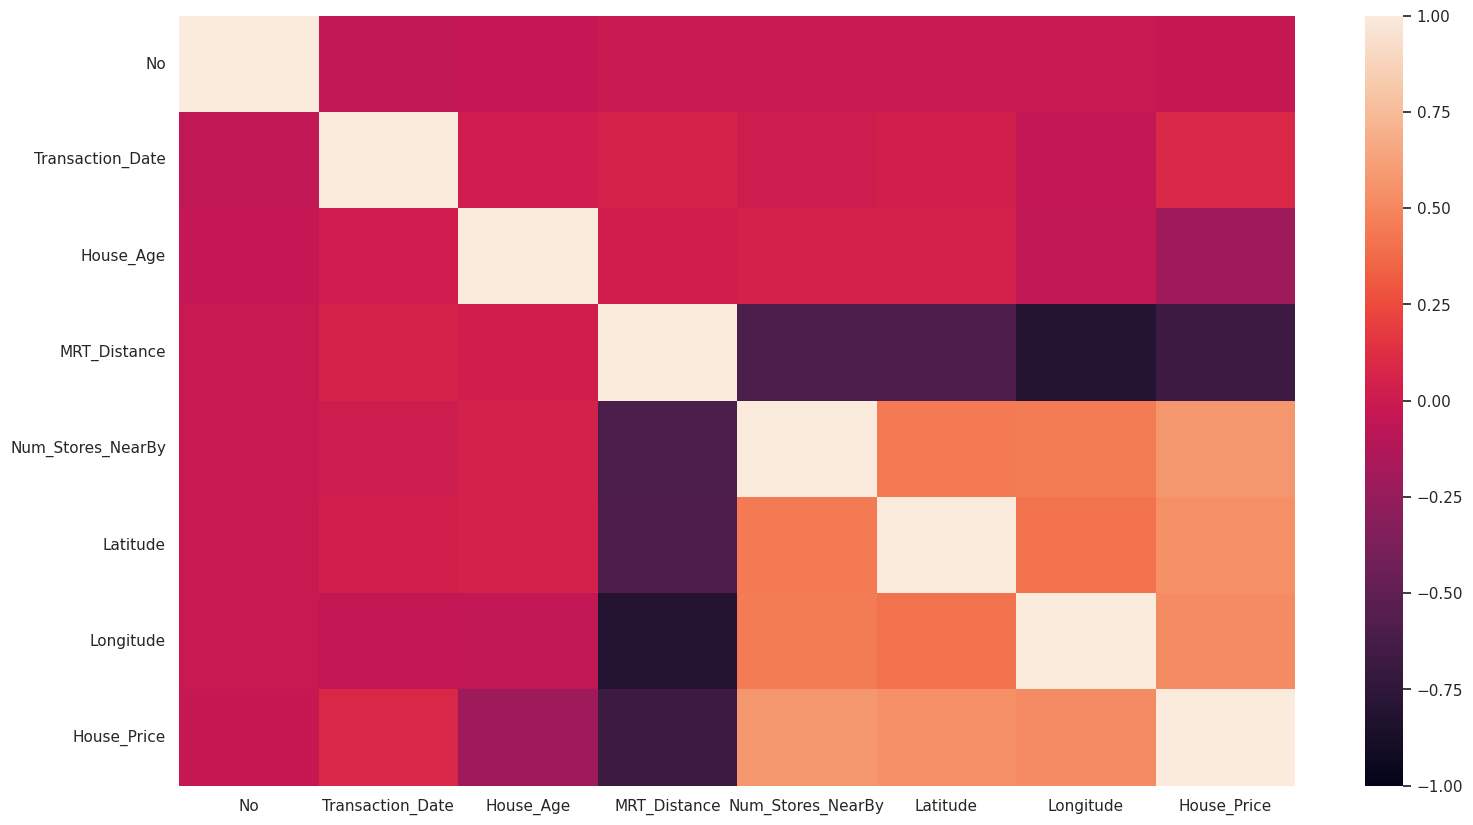

In [ ]:
# Show various plots for visualization of the above information
sns.set(rc = {'figure.figsize':(18,10)})
hmap = sns.heatmap(df.corr(), vmin = -1, vmax = 1)

<Axes: >

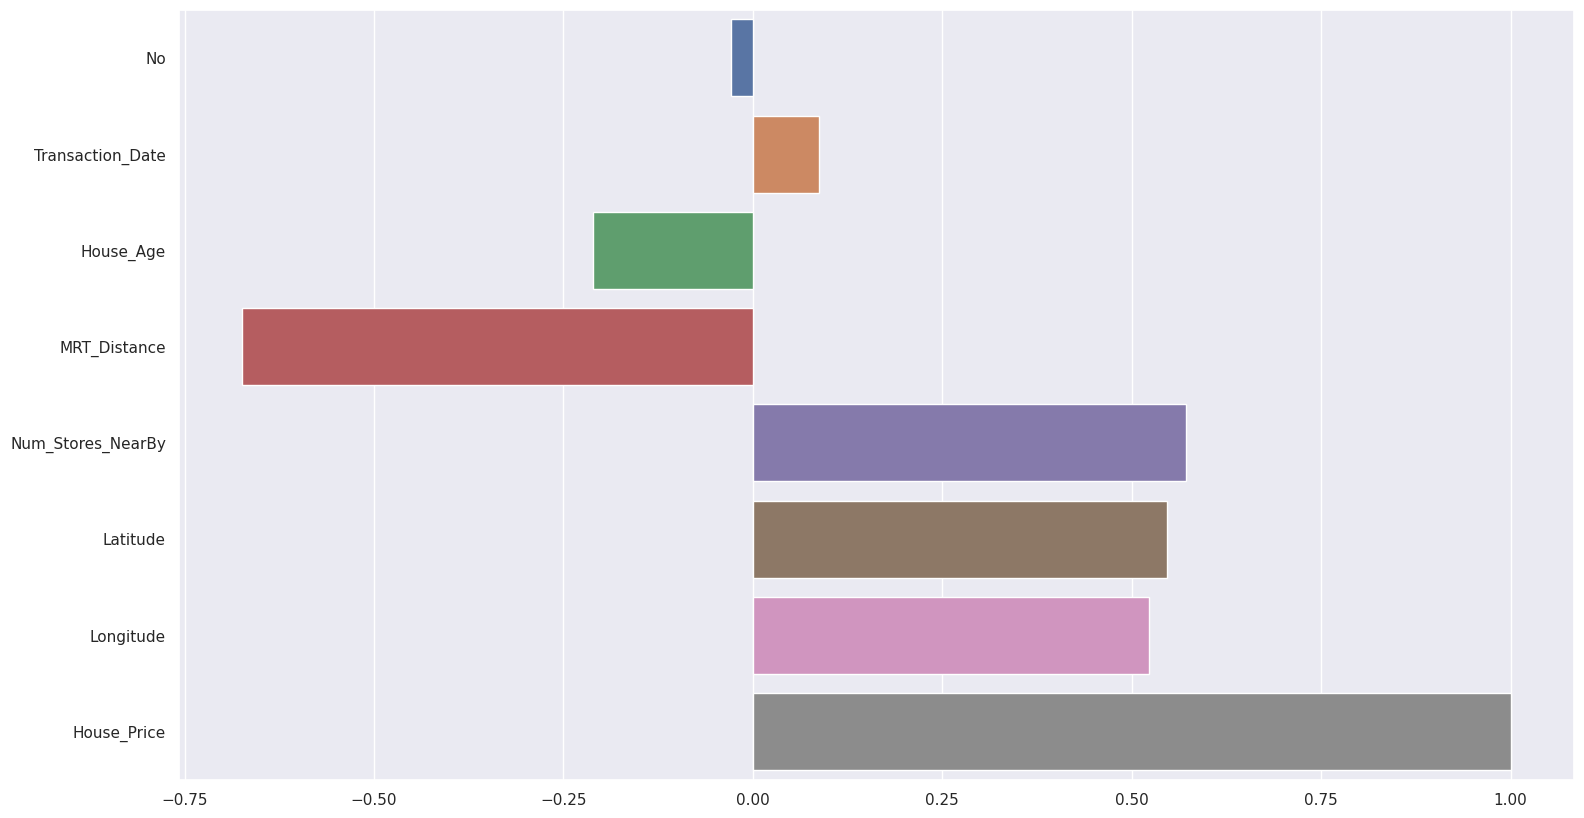

In [ ]:
# Checking the correlation of all the attributes vs the House_Price variable
sns.barplot(y = df.corr().loc['House_Price'].index, x = df.corr().loc['House_Price'].values)

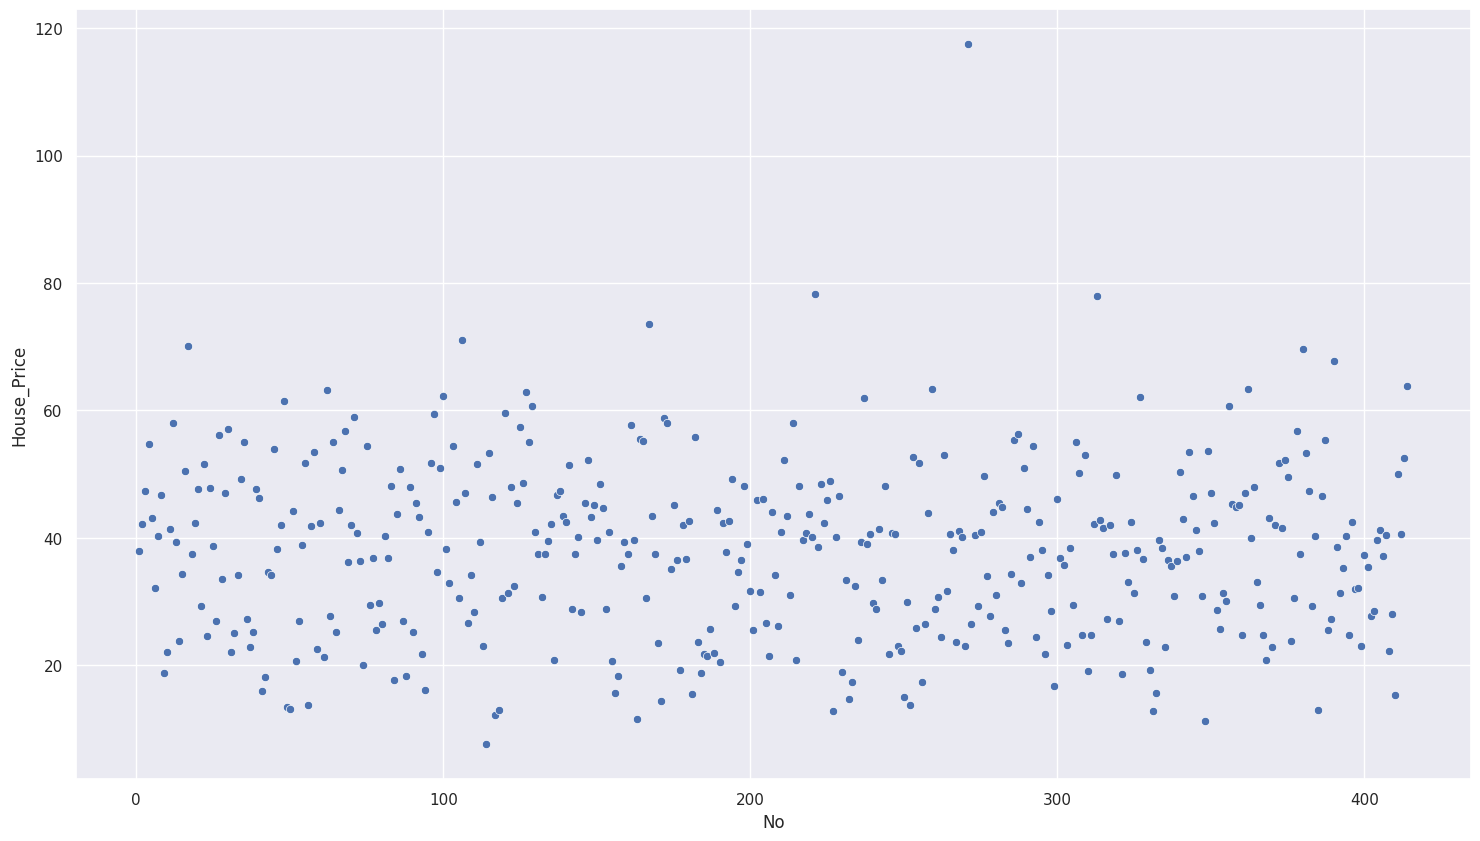

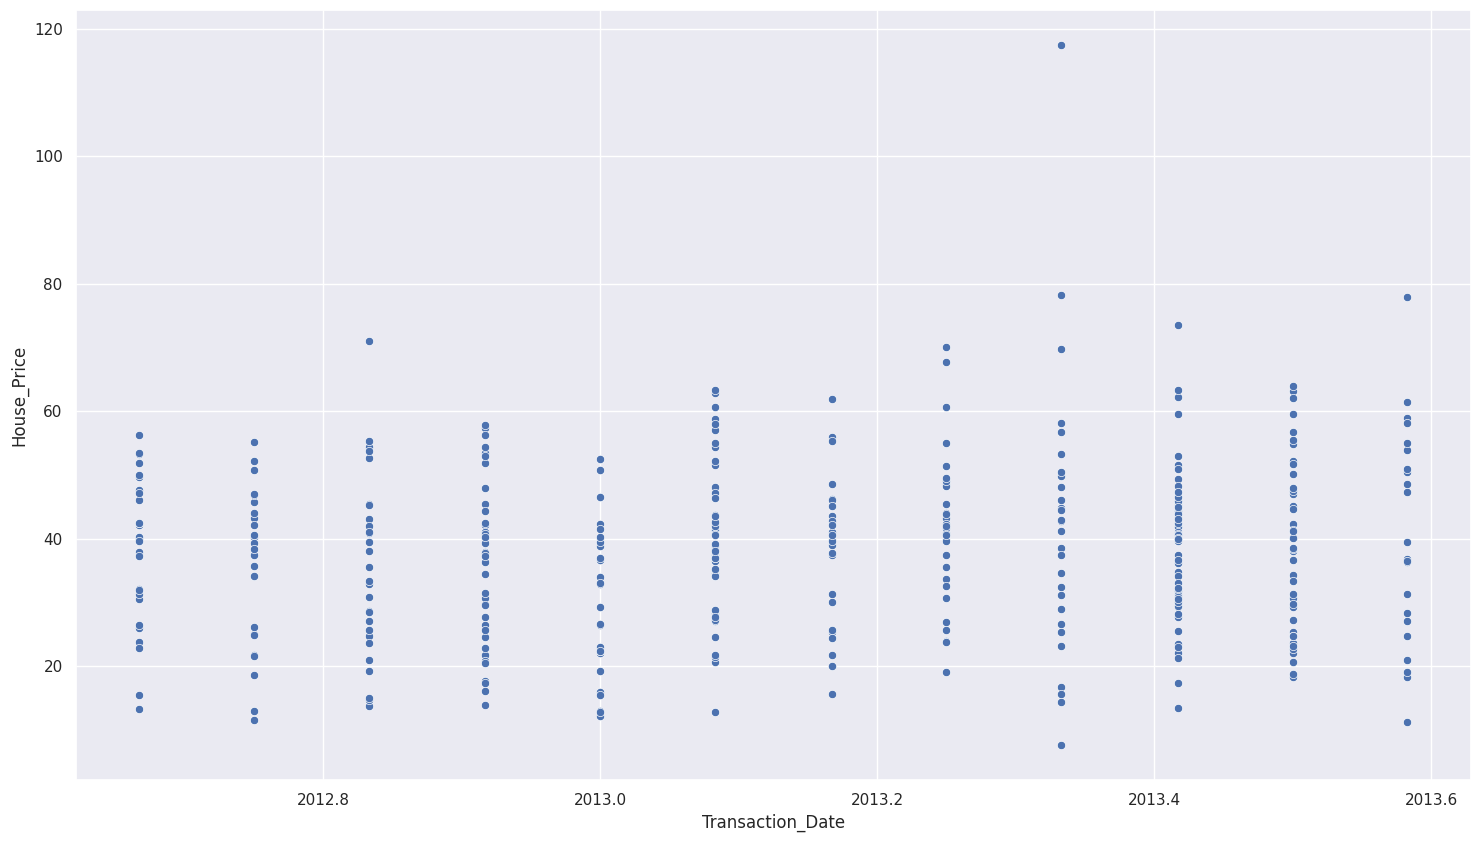

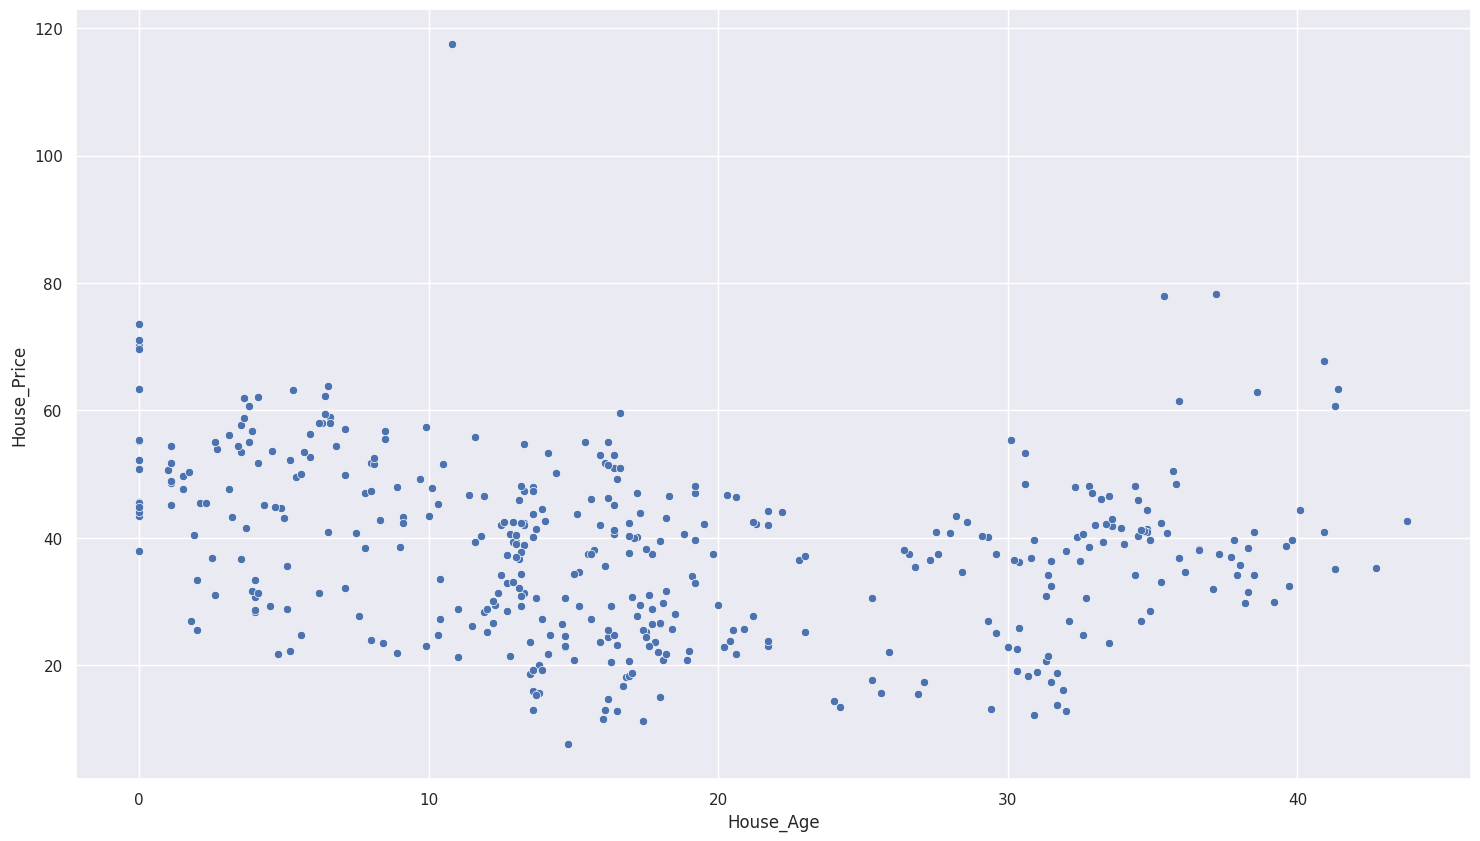

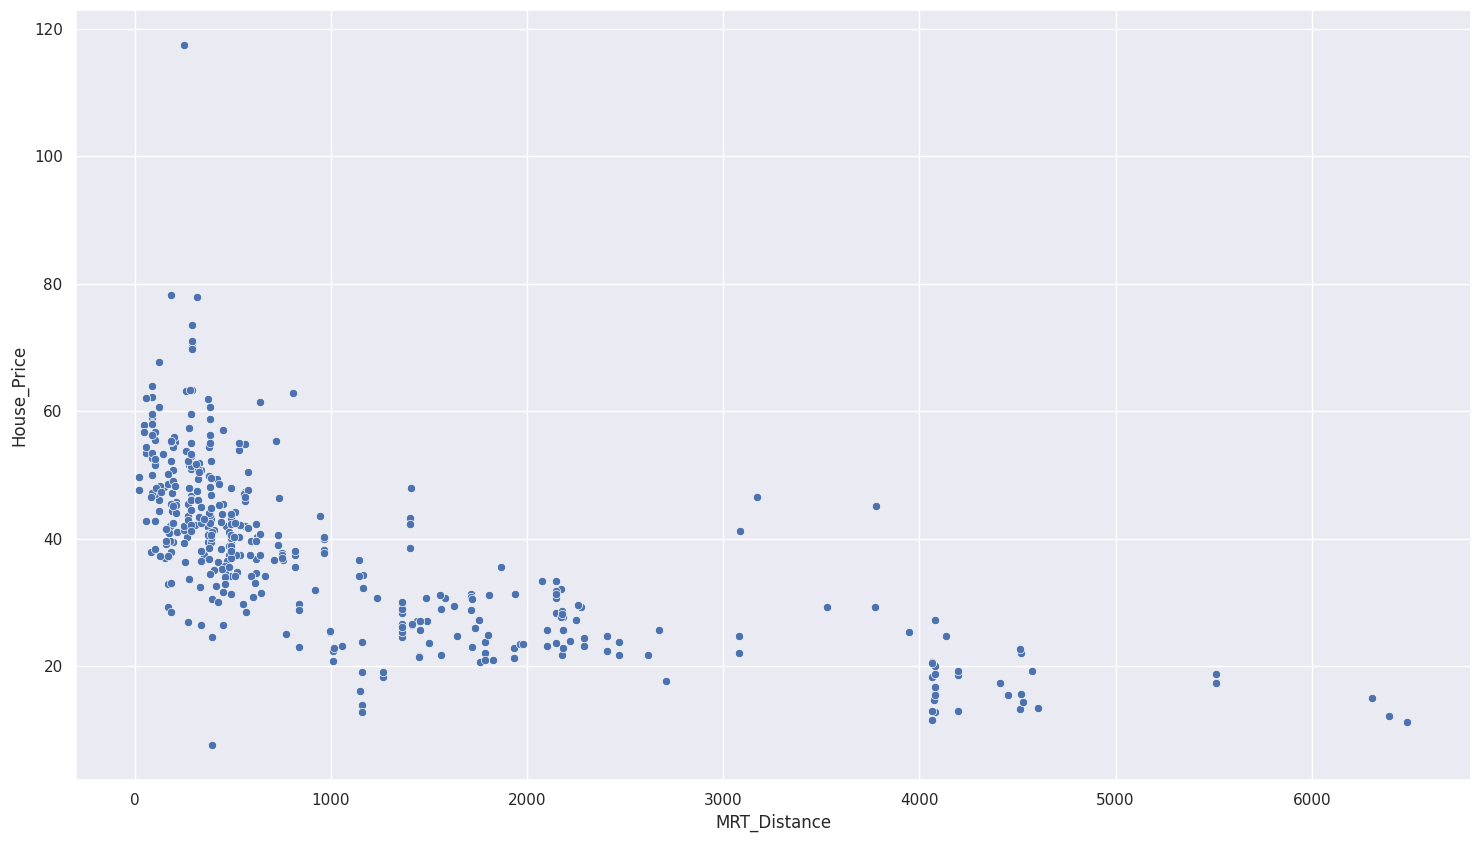

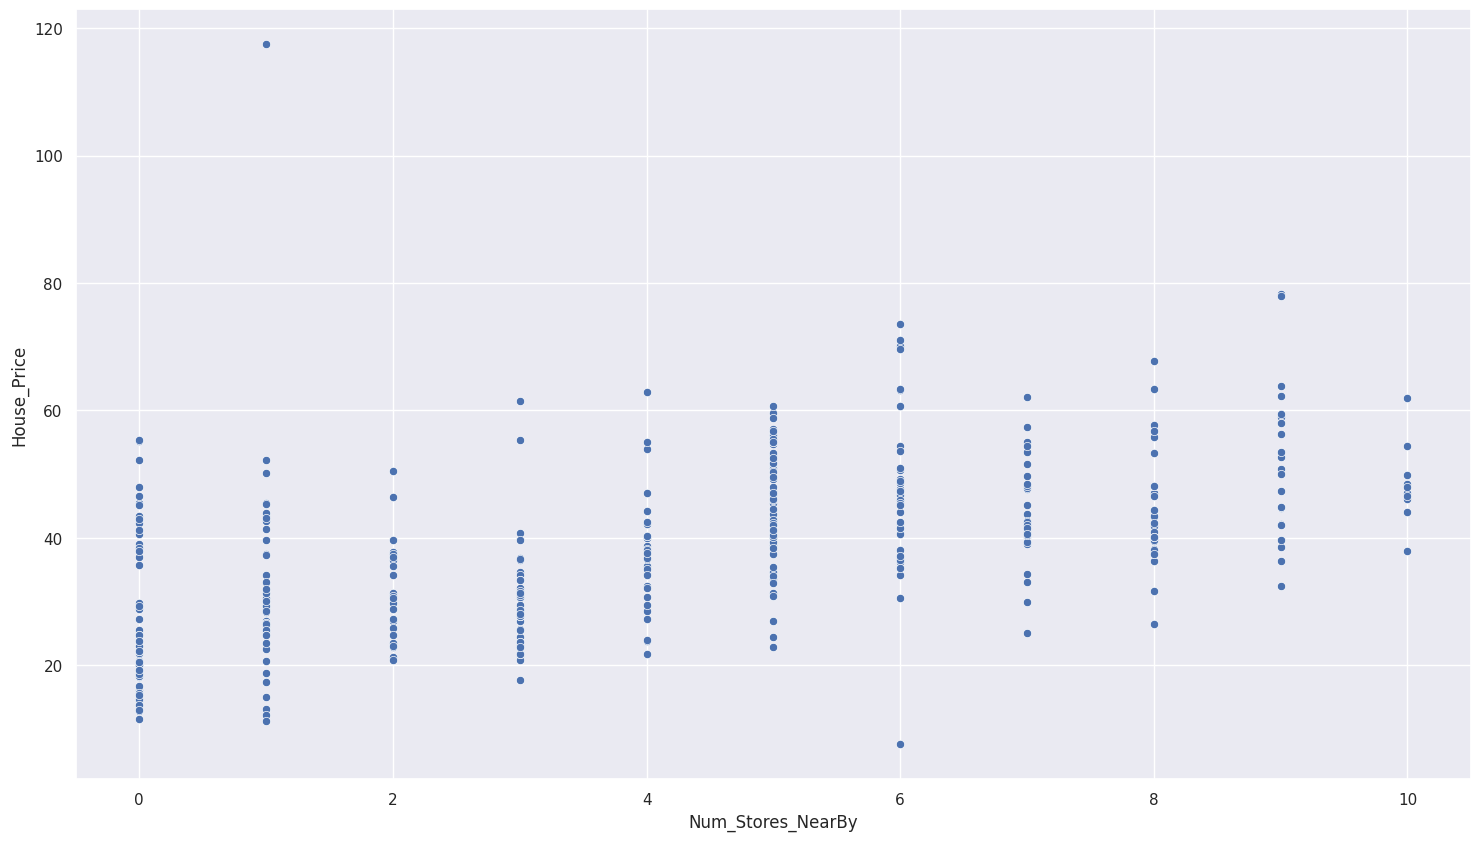

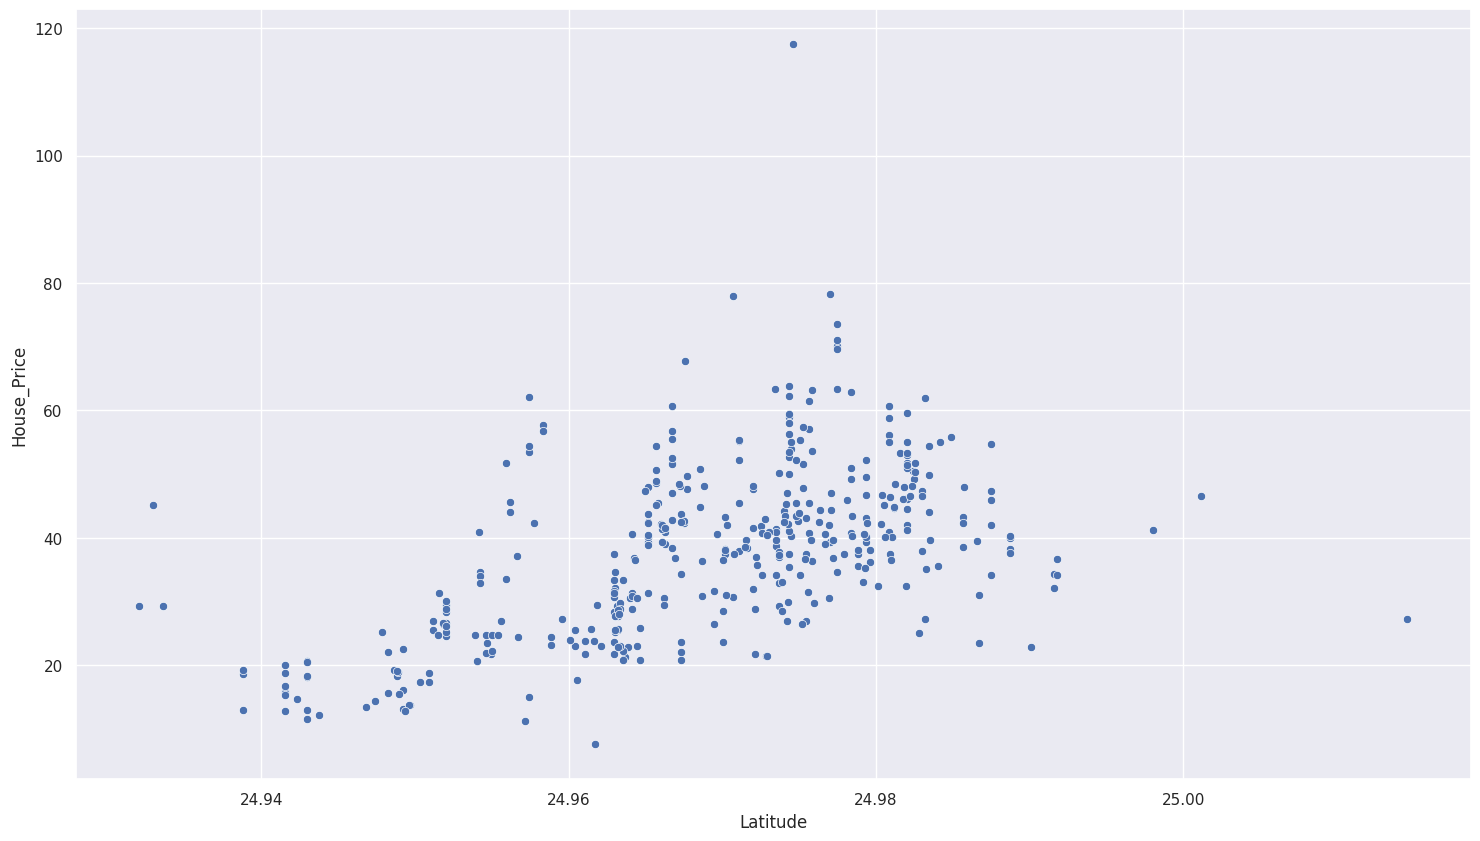

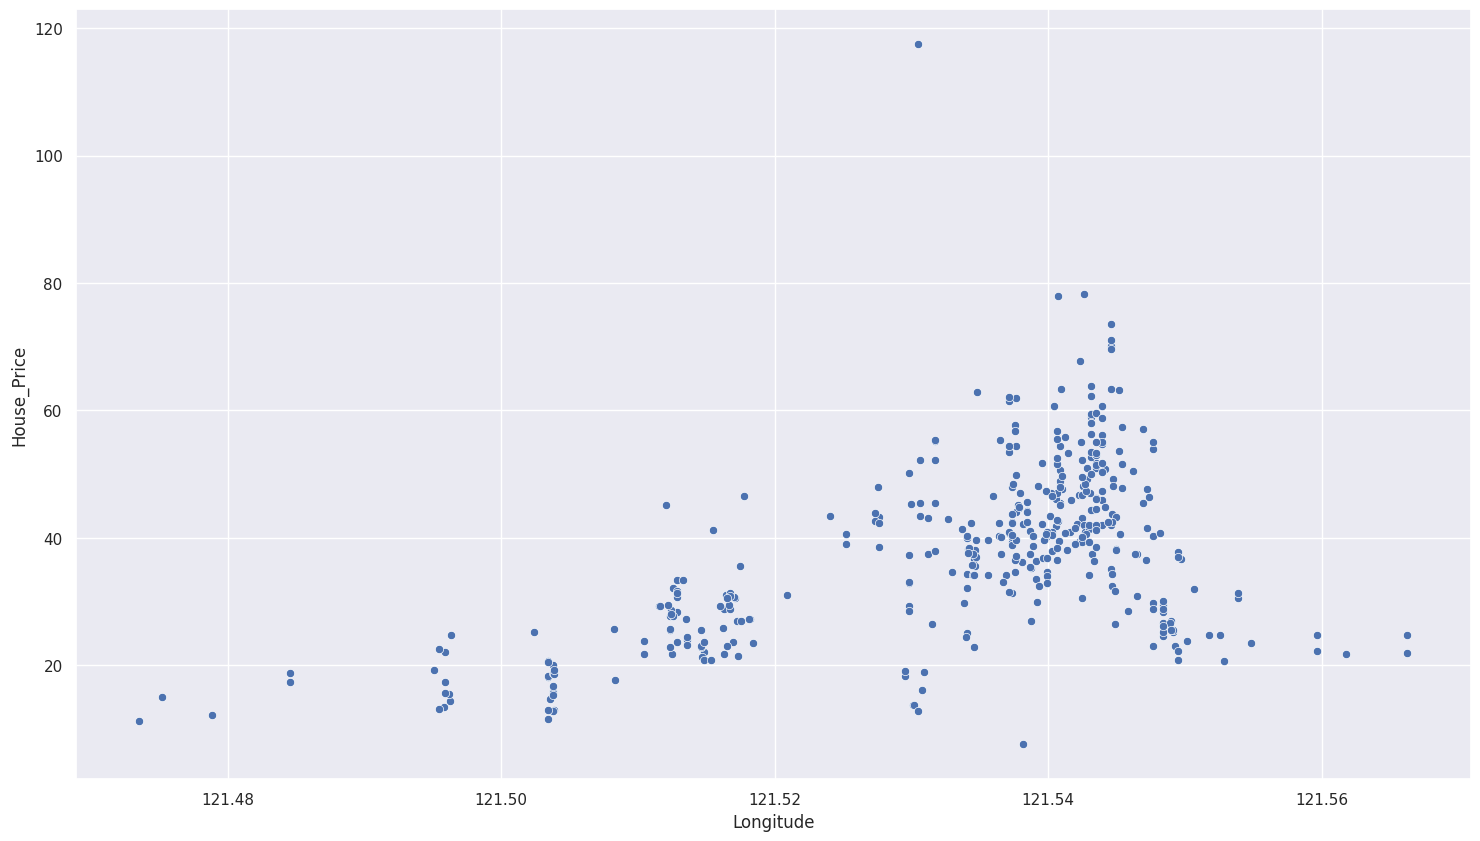

In [ ]:
# Plots for effect of each variable on House_Price
columns = df.columns

for i in range(len(columns) - 1):
    matplt.figure(i)
    sns.scatterplot(x = columns[i], y = 'House_Price', data = df)

No


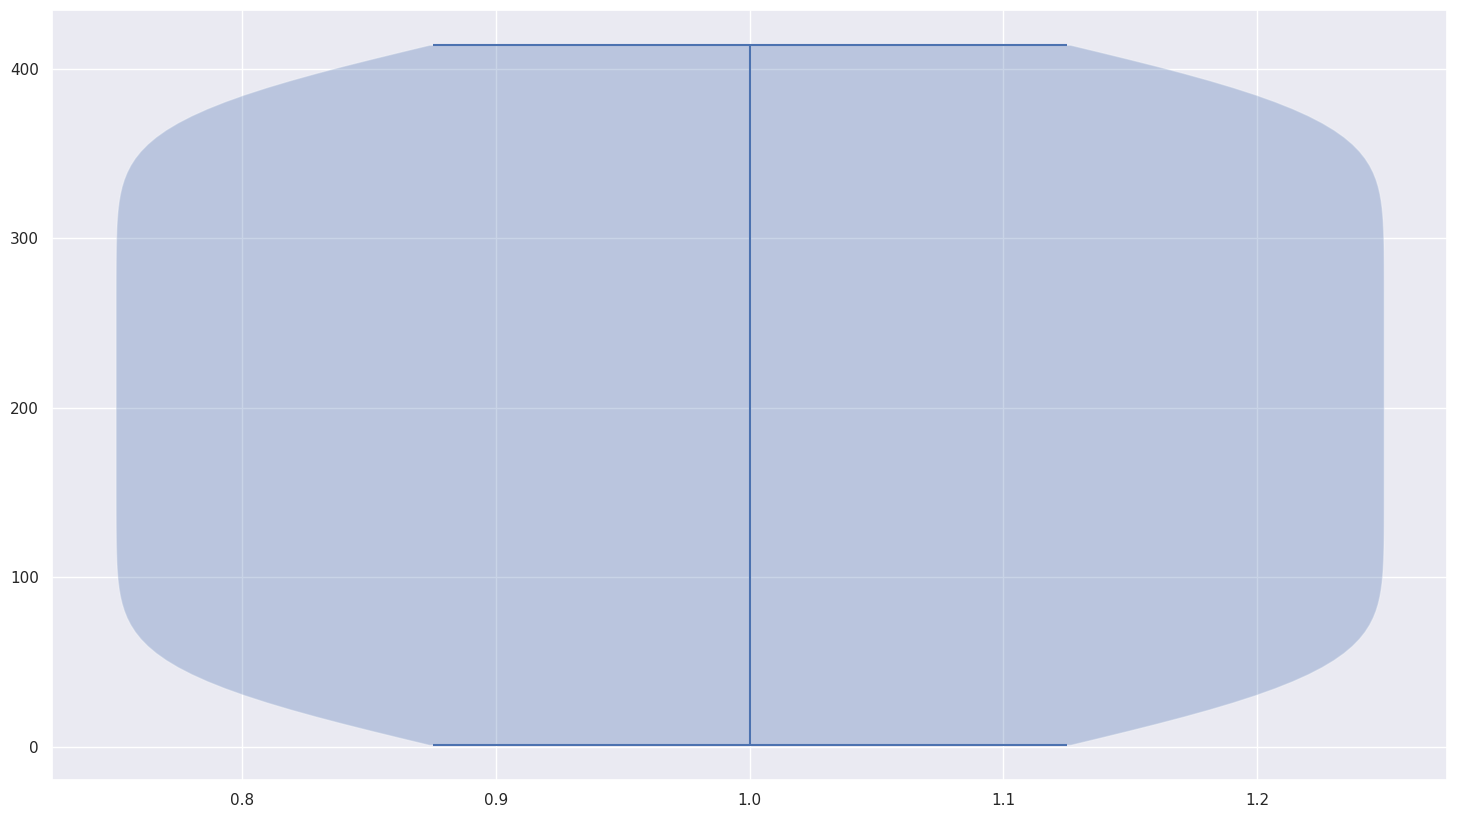

Transaction_Date


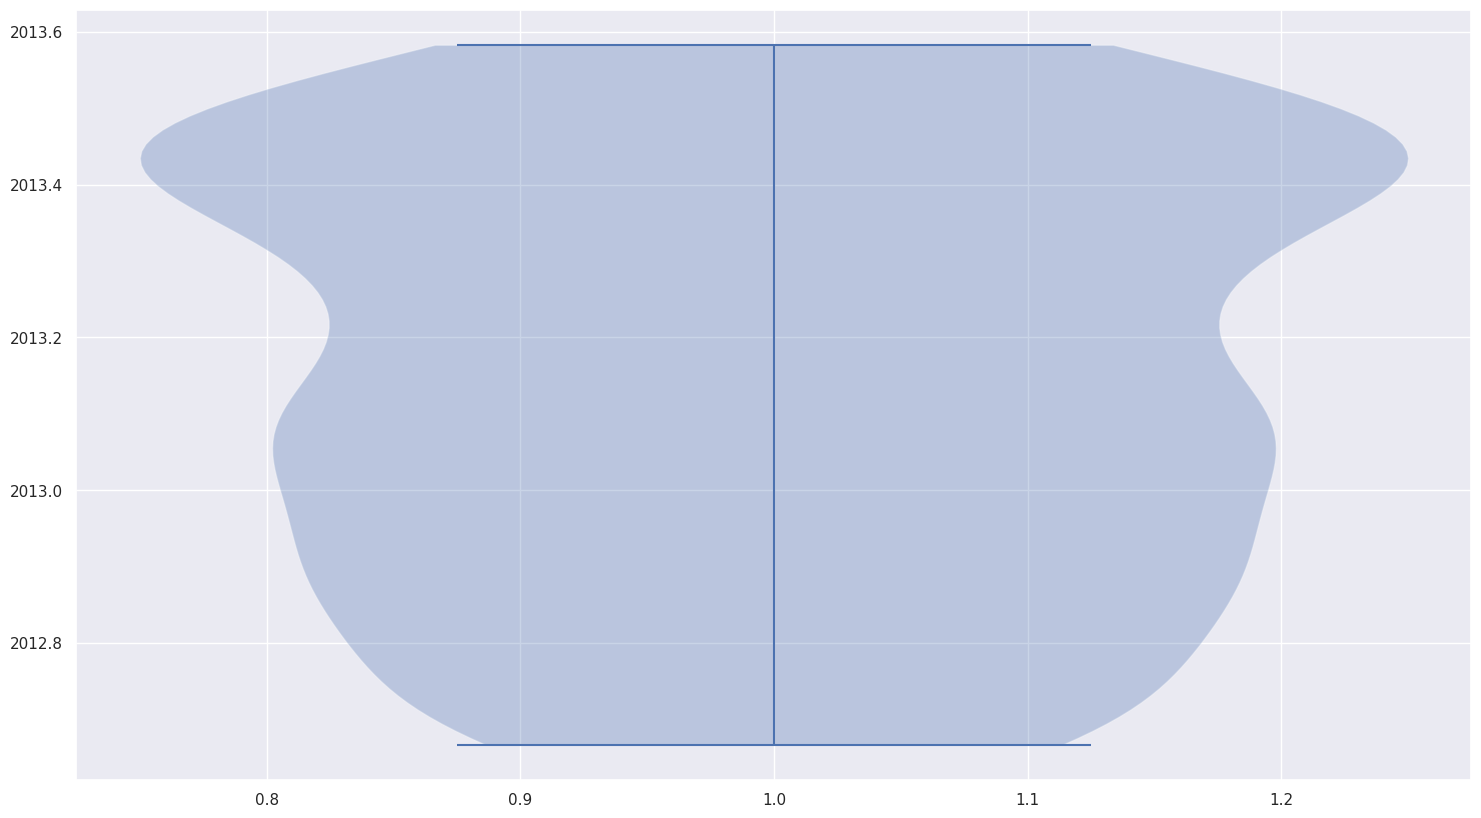

House_Age


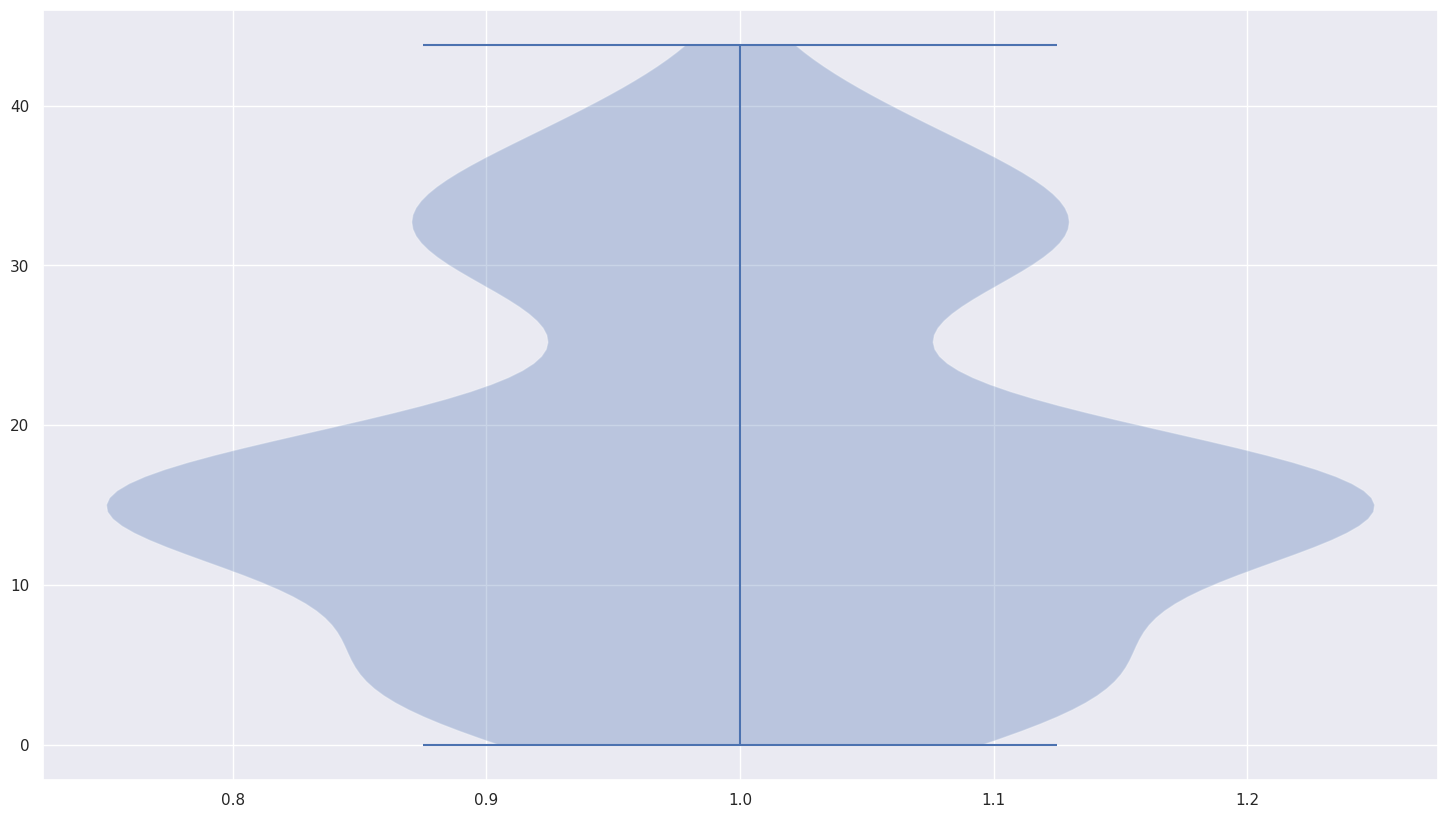

MRT_Distance


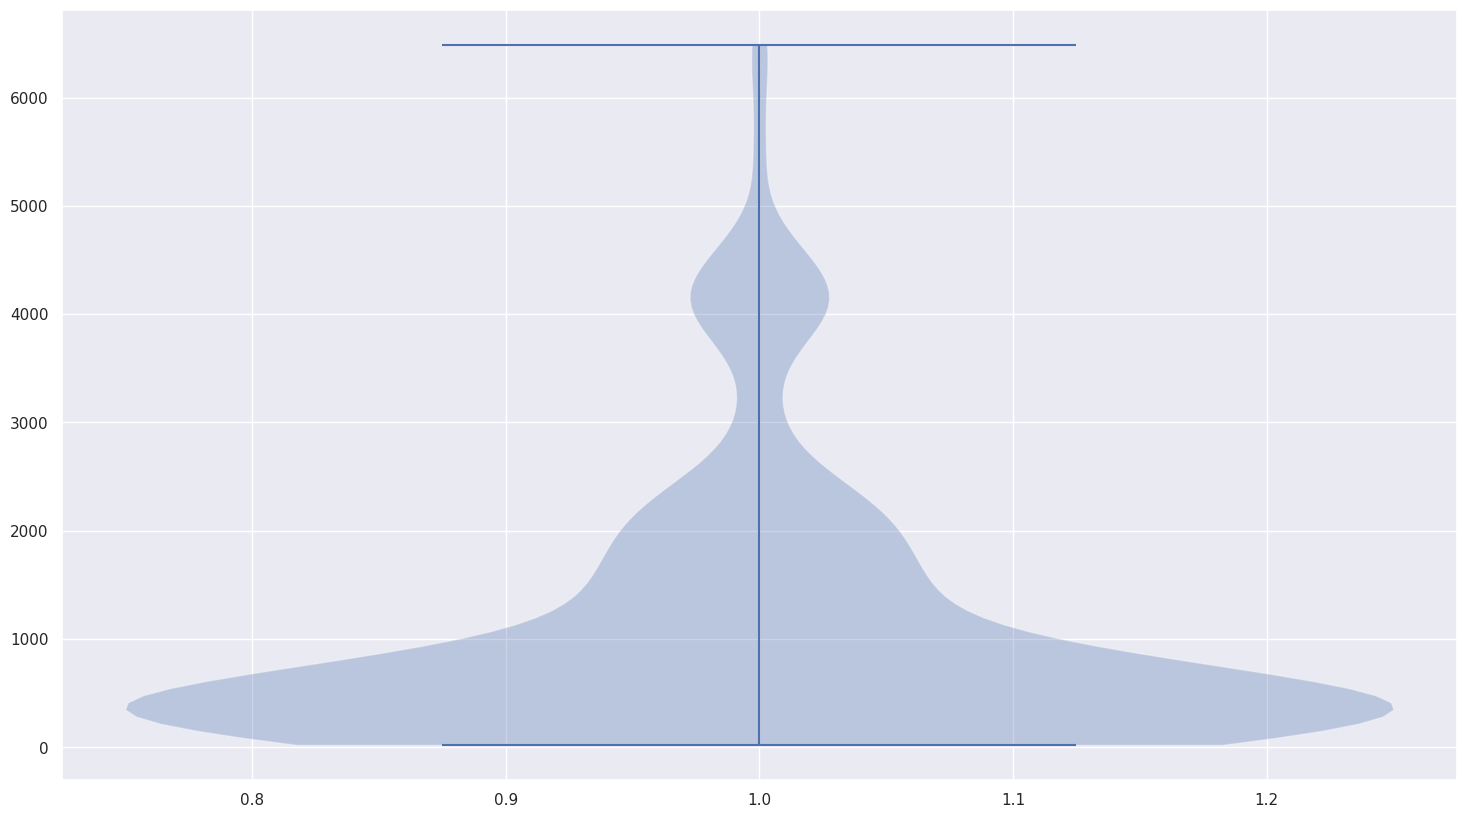

Num_Stores_NearBy


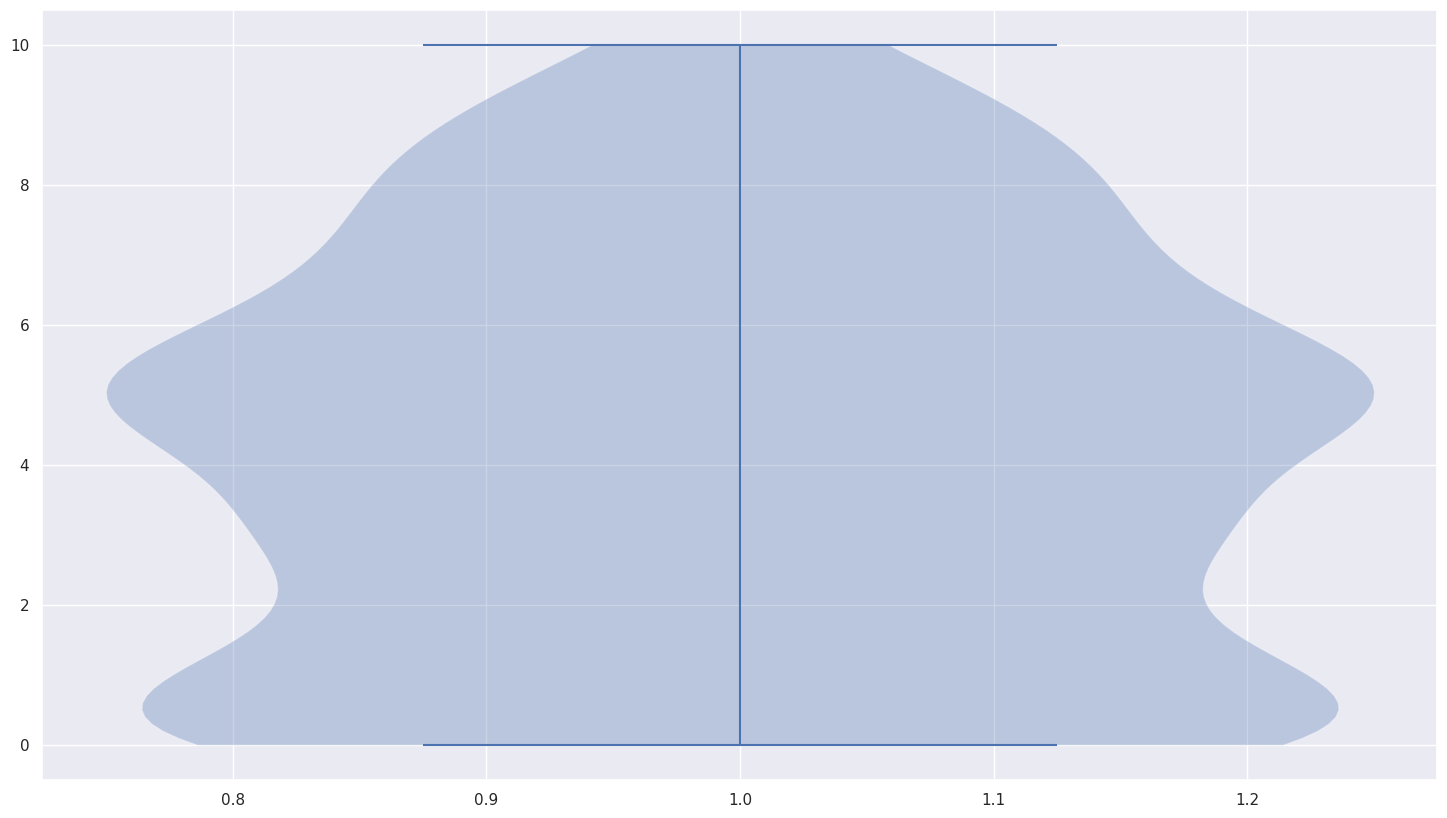

Latitude


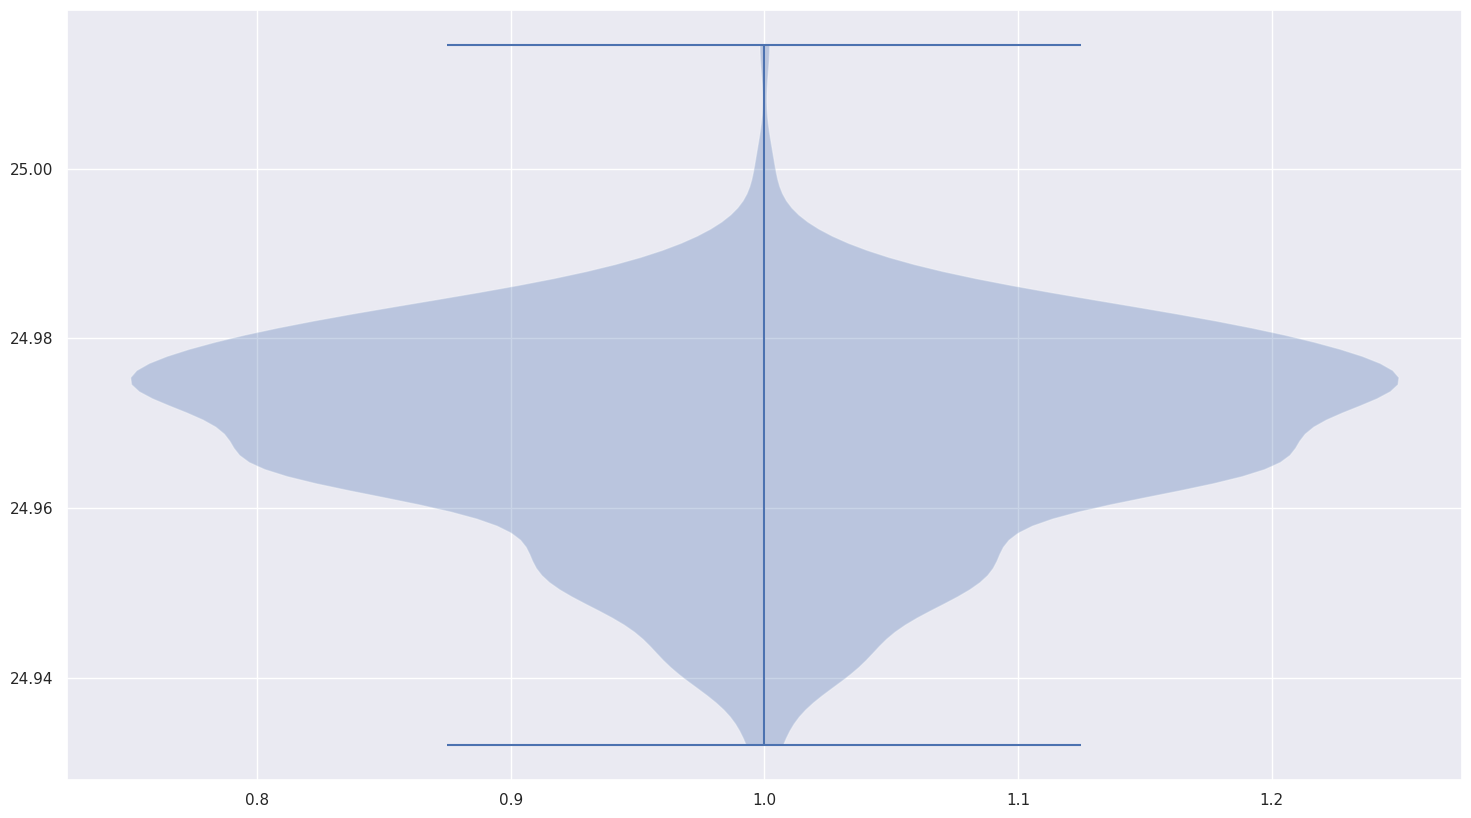

Longitude


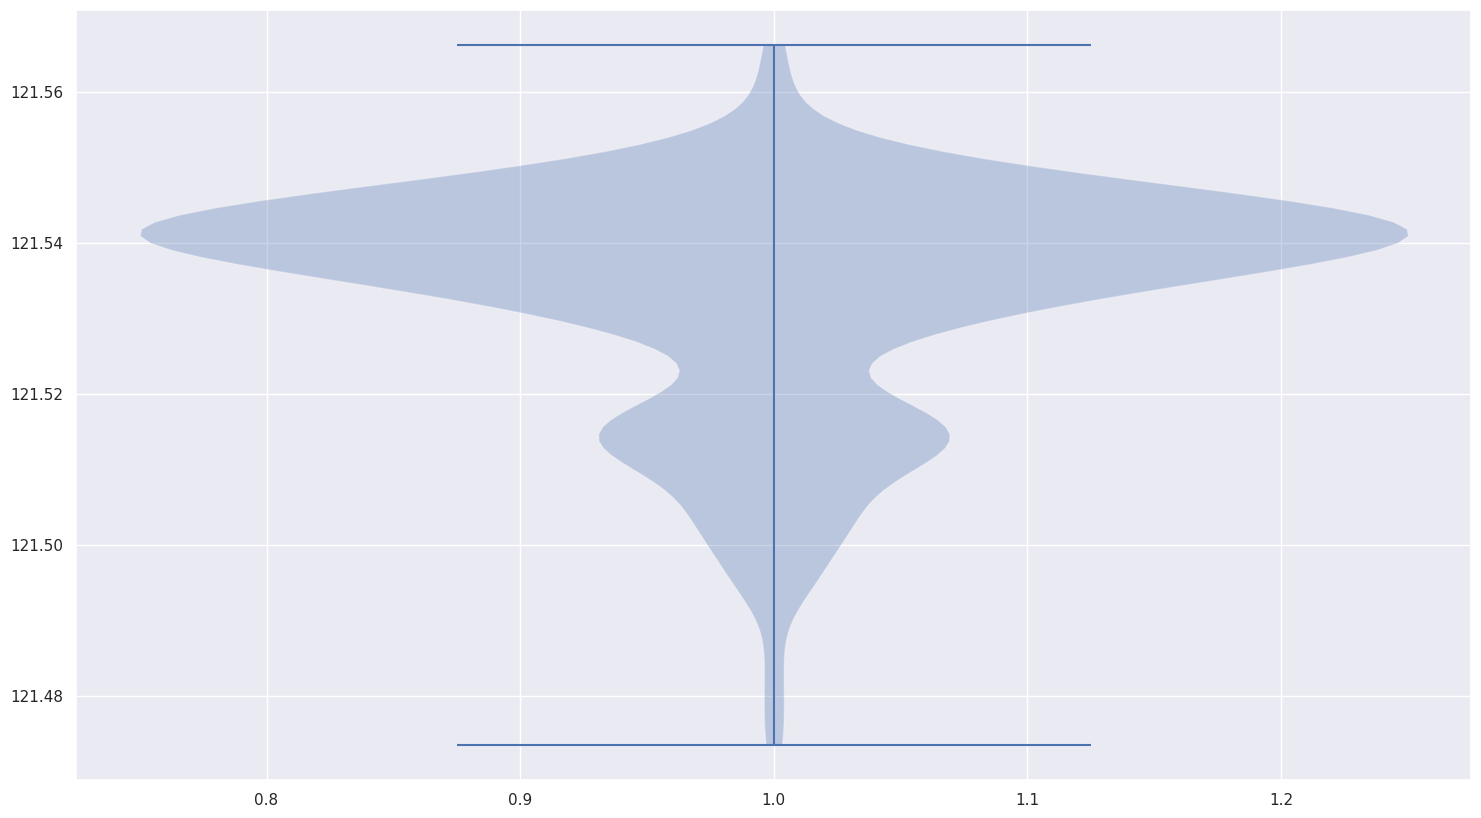

House_Price


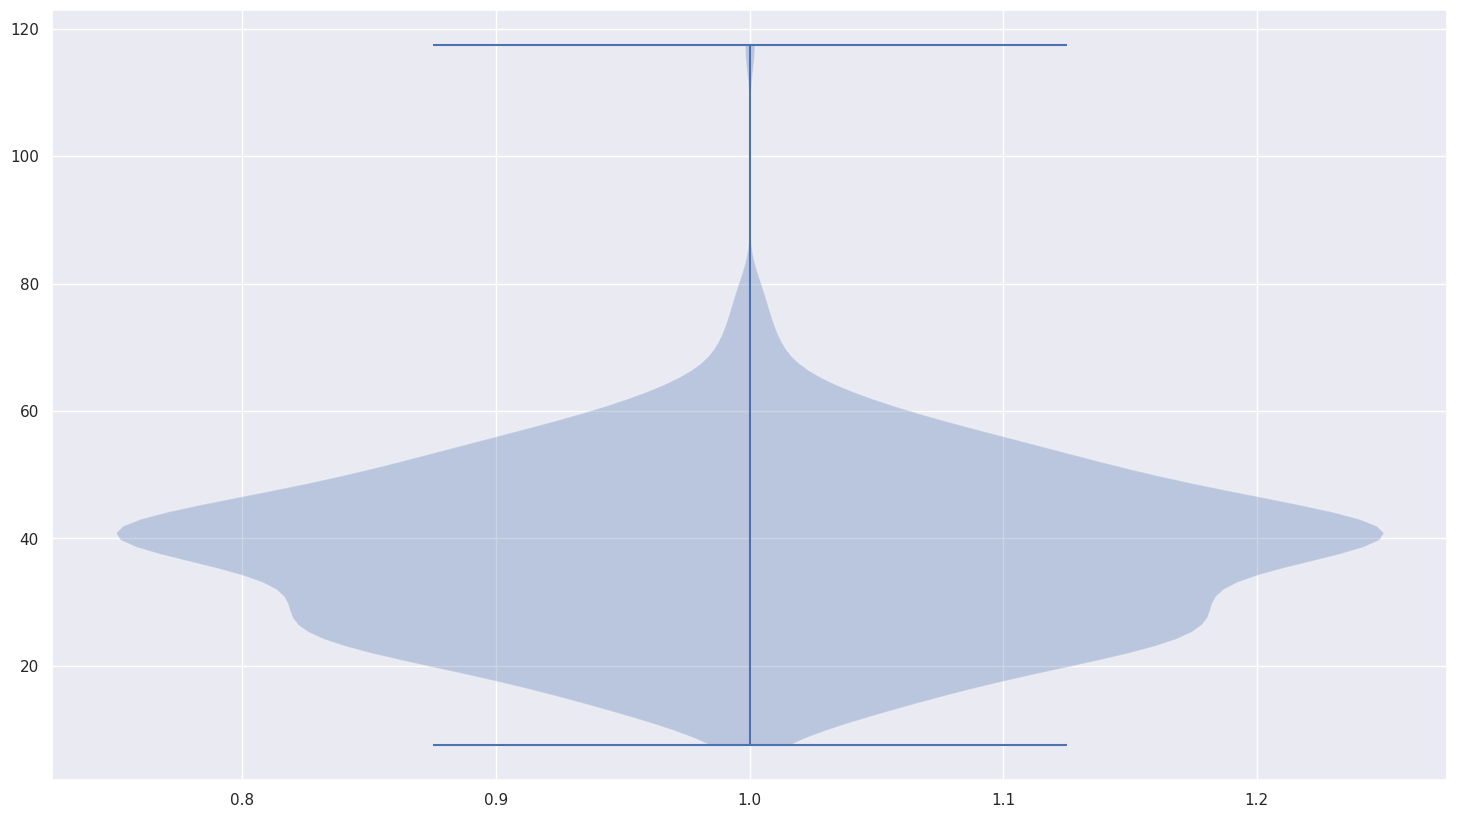

In [ ]:
# Violin plot:
for i in range(len(df.columns)):
    print(df.columns[i])
    matplt.violinplot(df.iloc[:,i])
    matplt.show()

<----Linearity---->


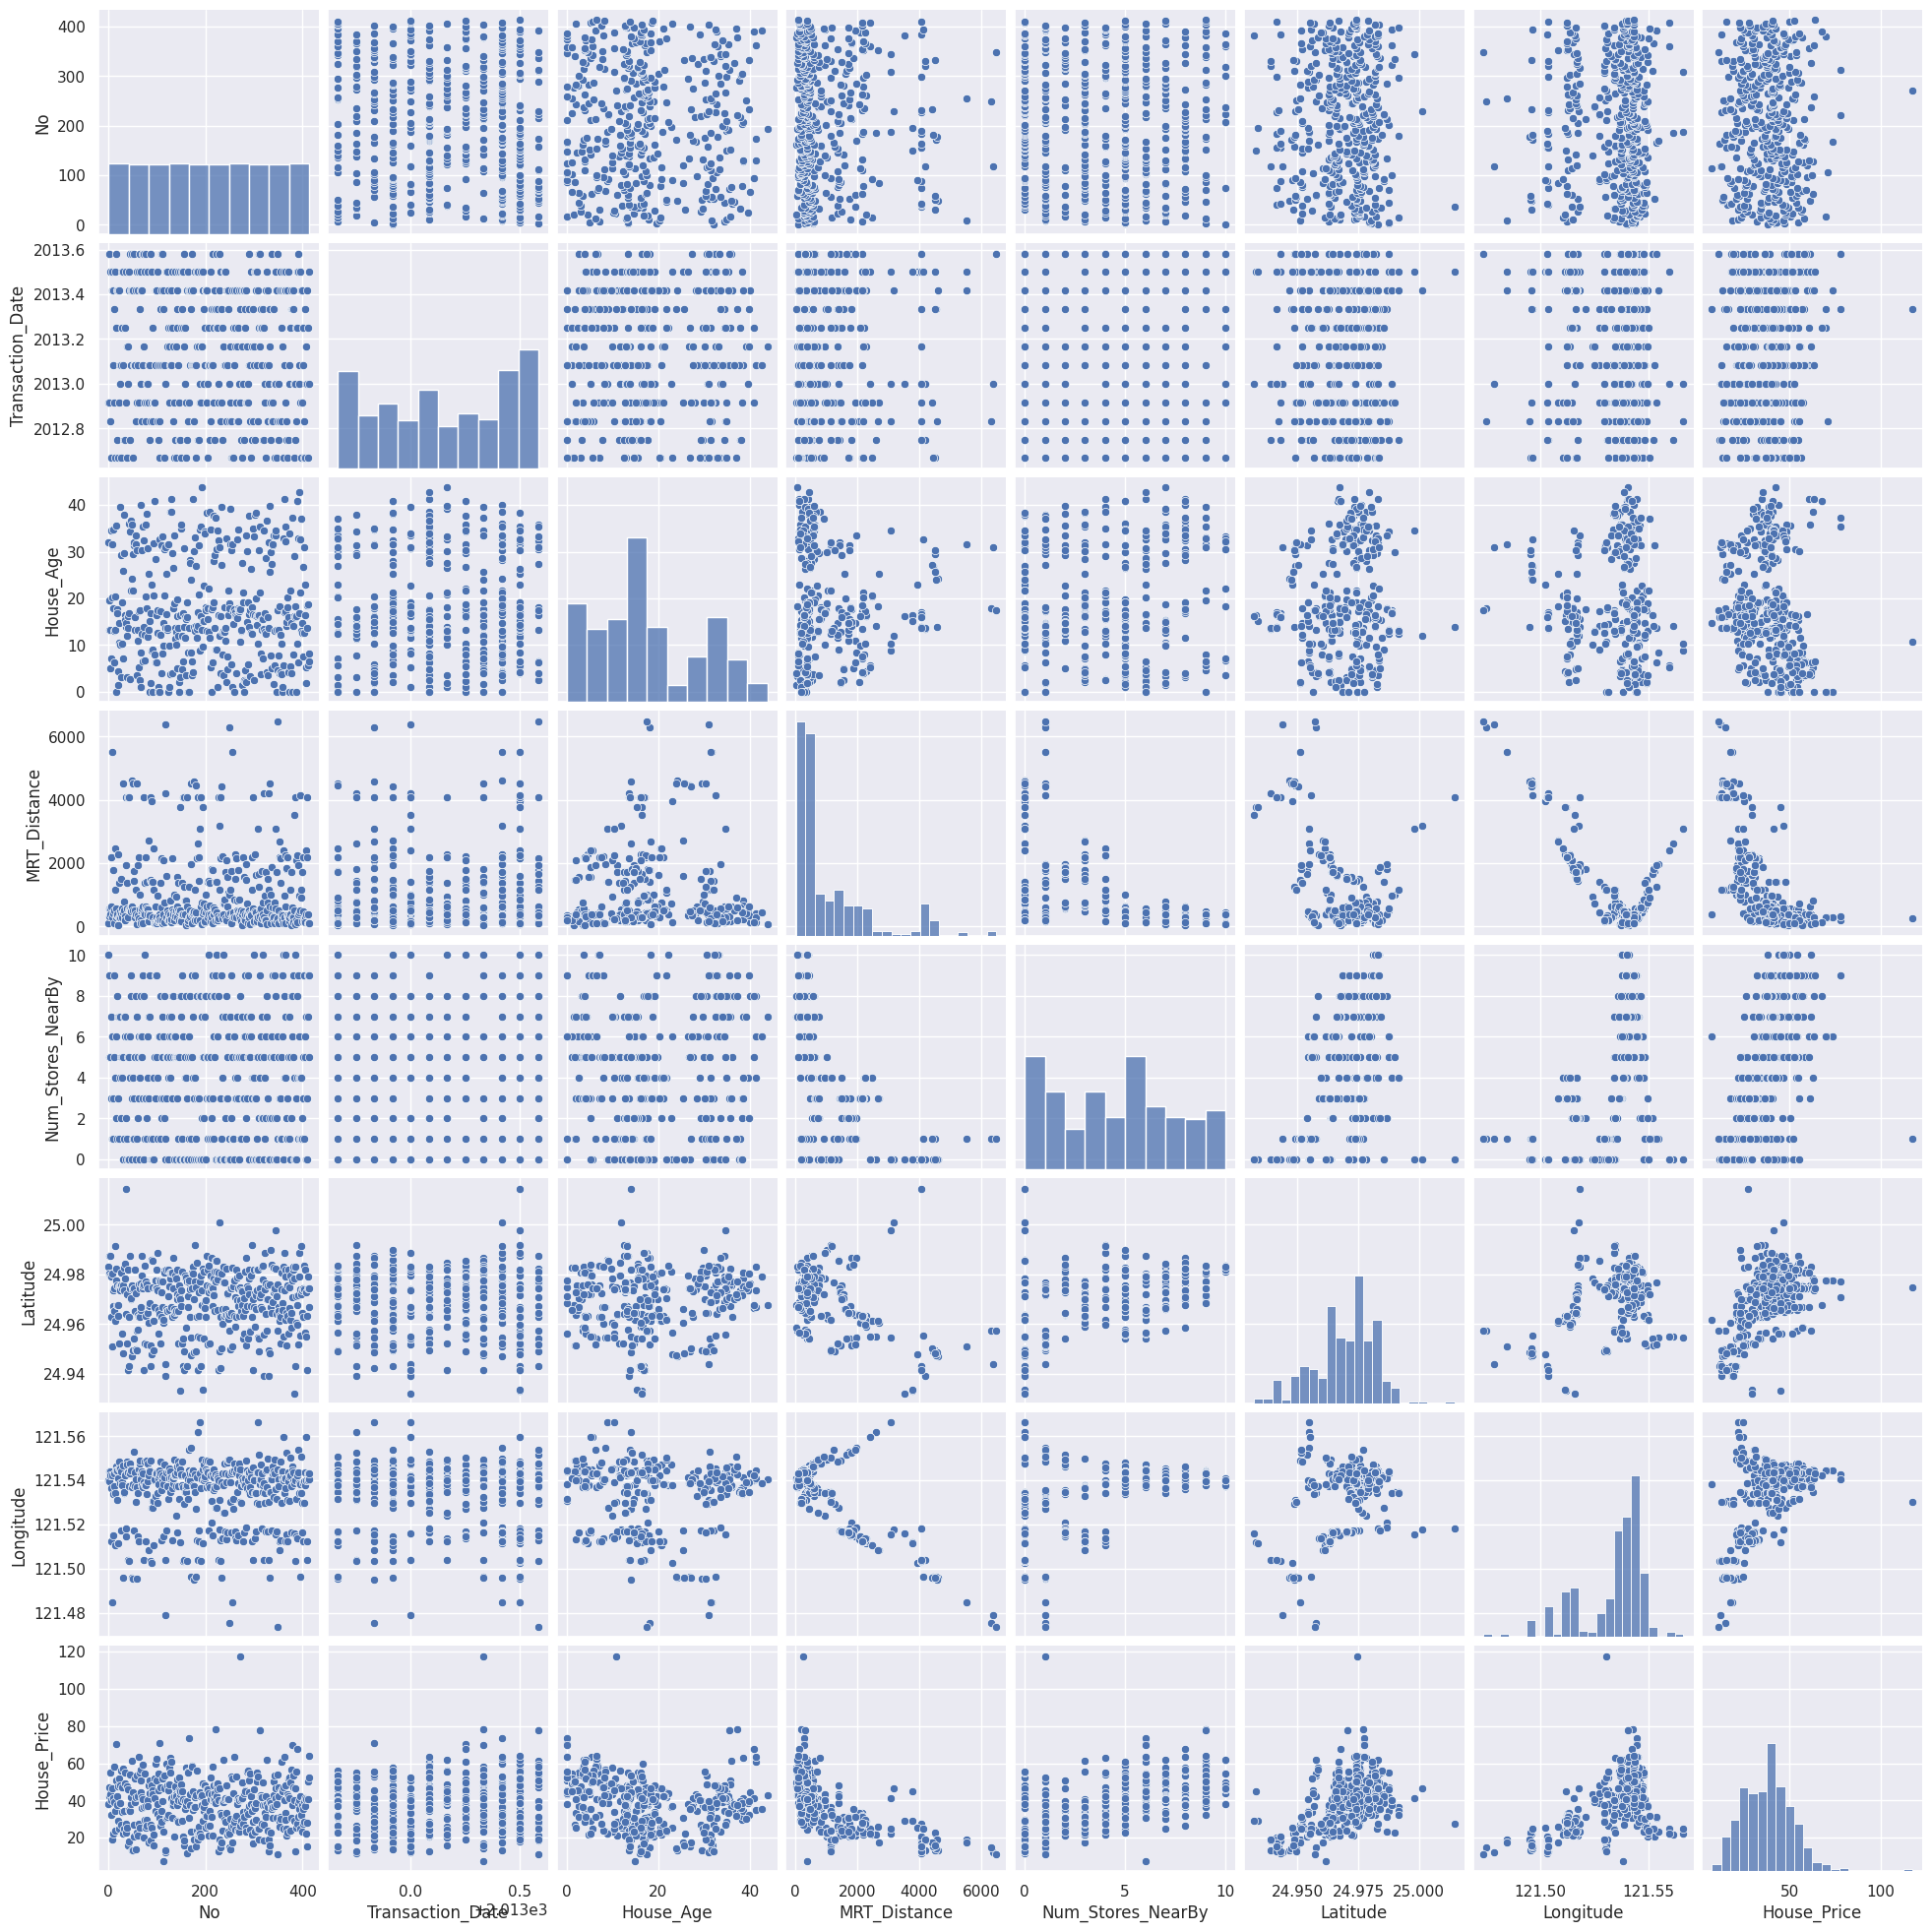

In [ ]:
# Collinearity Check:
print("<----Linearity---->")
sns.pairplot(df)

In [ ]:
# Based on the above heatmap, bar graphs, correlation scatter and violin plots we can colclude that
# High Correlation Attributes w.r.t target variable are MRT_Distance, Num_Stores_NearBy, Latitude, Longitude, House_Age. and
# Neligible Correlation Attributes w.r.t target variable are No and Transaction_Date.

# Dropping the insignificant attributes from the data set
dataframe = df.drop(['Transaction_Date', 'No'], axis = 1)
print(dataframe.columns)

Index(['House_Age', 'MRT_Distance', 'Num_Stores_NearBy', 'Latitude',
       'Longitude', 'House_Price'],
      dtype='object')


**Cost Function and Gradient Descent Function for Linear Regression**

In [ ]:
class LinearRegression:
    # Initializes the learning rate and the max Iteration
    def __init__(self, learning_rate, max_iterations):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations

    # Function that finds the best fit line
    def bestfit(self, X, Y):
        self.X = X
        self.Y = Y

        # Create an array for the loss function
        self.cost = []

        # Adding a new columns for the x to hold X0 as 1
        self.weights = np.random.rand(self.X.shape[1] + 1).reshape(1, -1)

        # Create the weights like w0,w1,w2, etc...
        self.new_X = np.insert(self.X.T, 0, np.ones(self.X.shape[0]), axis=0)

        #cost funct
        derivation_cost = 0

        while self.max_iterations > -1:
          # finds the predicted value: w0x0 + w1x1+.. wnxn
          self.pred = np.dot(self.weights, self.new_X)

          # Append to the cost array
          self.cost.append(self.cost_function(self.pred, Y))

          # Find the number of rows in X
          m = self.X.shape[0]

          # Take derivative of the function
          derivation_cost = (self.new_X@(self.pred - self.Y).T) * 1 / m

          # Theta = Theta - learning rate * derivative
          self.weights -= (self.learning_rate * derivation_cost.reshape(1, -1))
          self.max_iterations -= 1

    # Function to find the cost_value
    def cost_function(self, X, Y):
        loss = np.sum(np.square(X.reshape(-1, 1) - Y.reshape(-1,1))) / (2 * X.shape[0])
        return np.round(loss, 3)

    # Function to find the r2_value
    def r2_score(self,X,Y):
        return 1 - (((Y - self.predict(X)) ** 2).sum() / ((Y - Y.mean()) ** 2).sum())

    # Function to find the predicted value for X
    def predict(self,X):
        X = np.insert(X.T, 0, np.ones(X.shape[0]), axis = 0)
        return np.dot(self.weights, X)



In [ ]:
# Prepare X and Y matrix
X = np.array(dataframe.drop(['House_Price'], axis = 1))
Y = np.array(dataframe['House_Price'])

In [ ]:
# Split train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 99)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(289, 5) (125, 5) (289,) (125,)


In [ ]:
# Scaling the data set
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

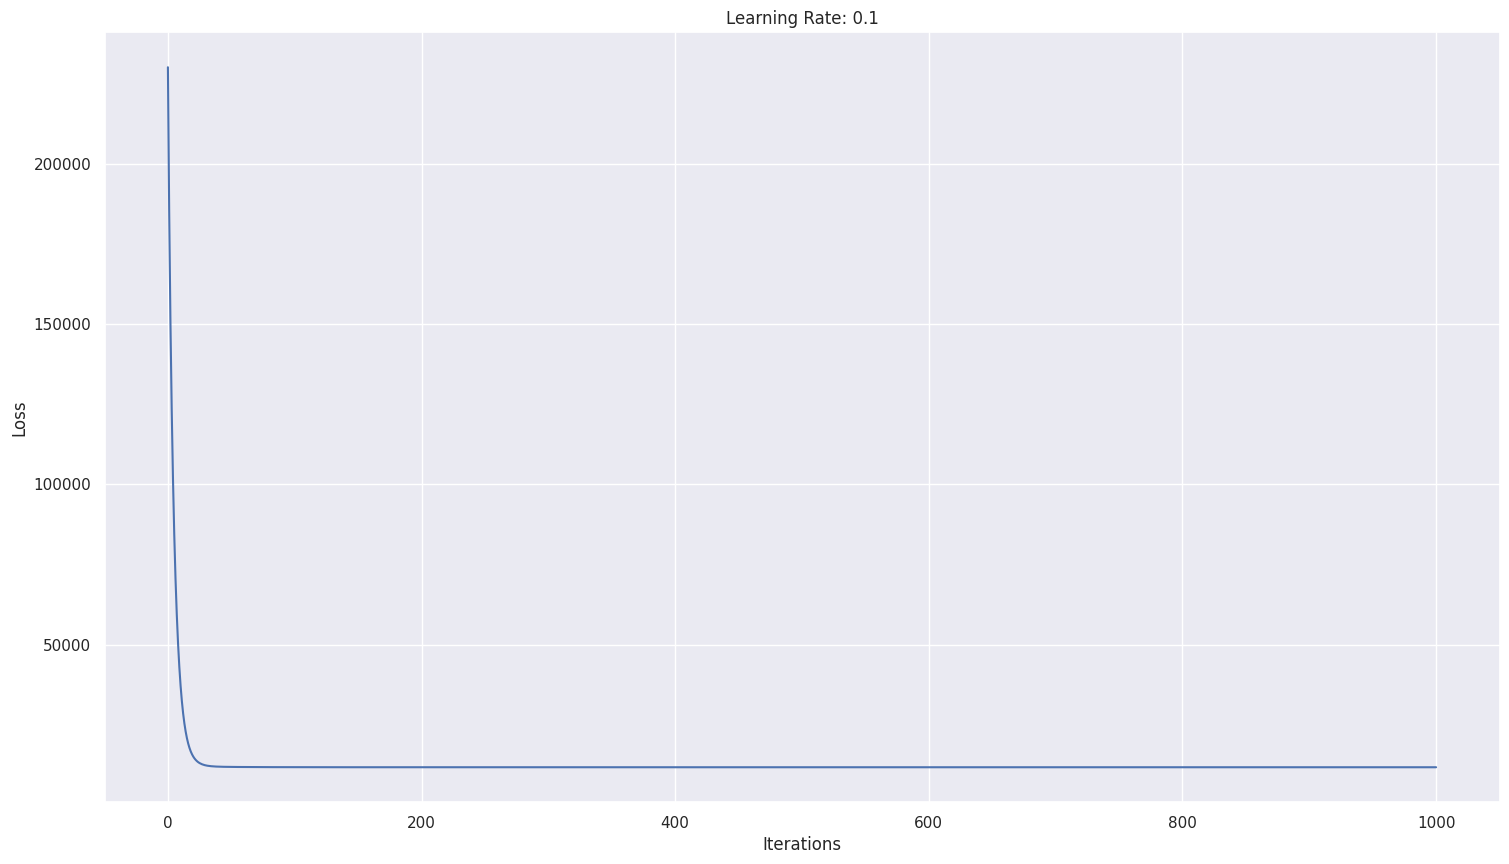

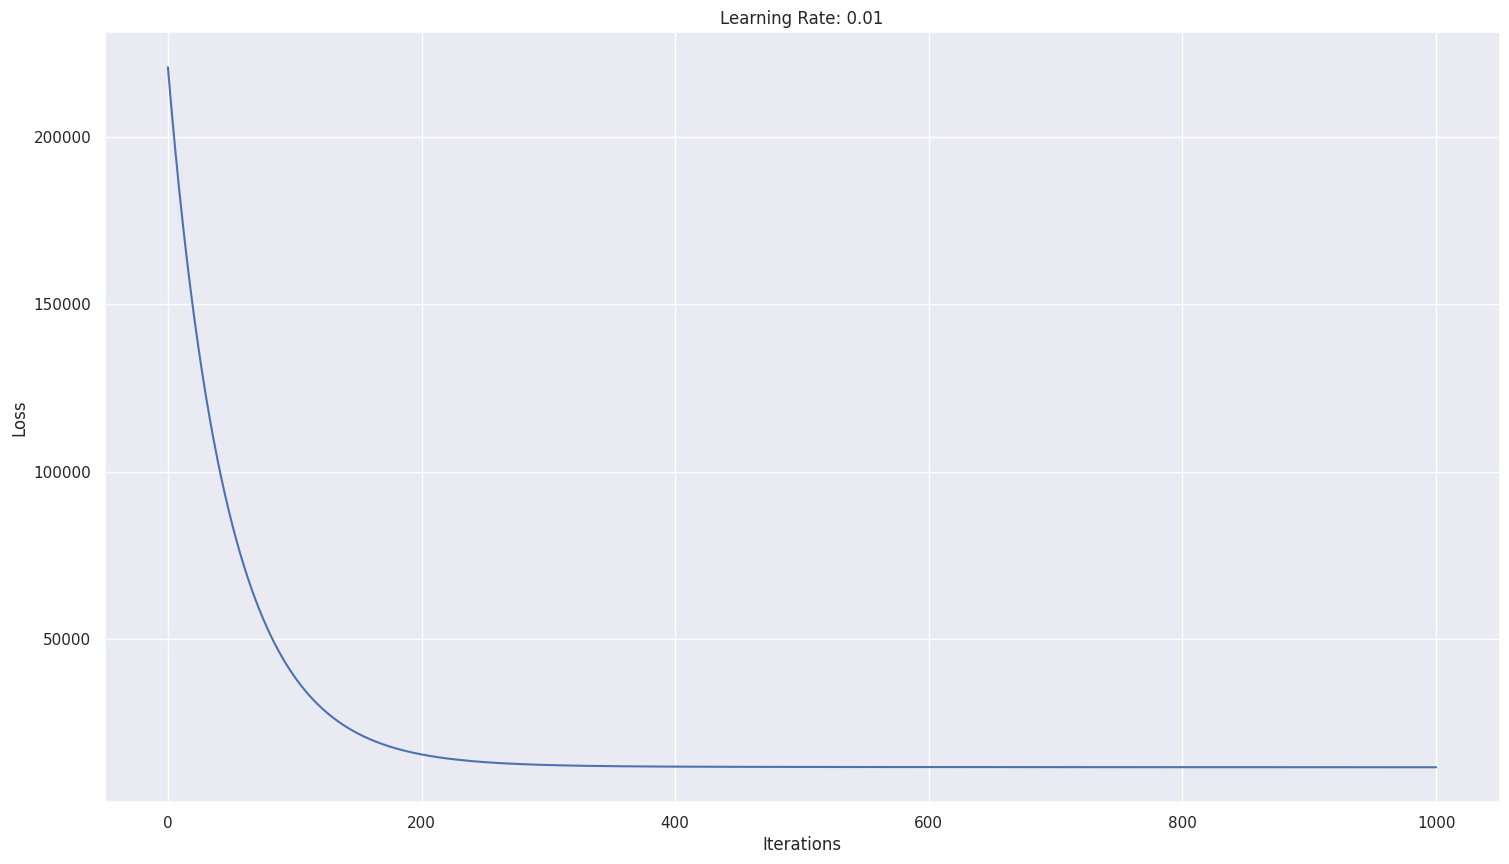

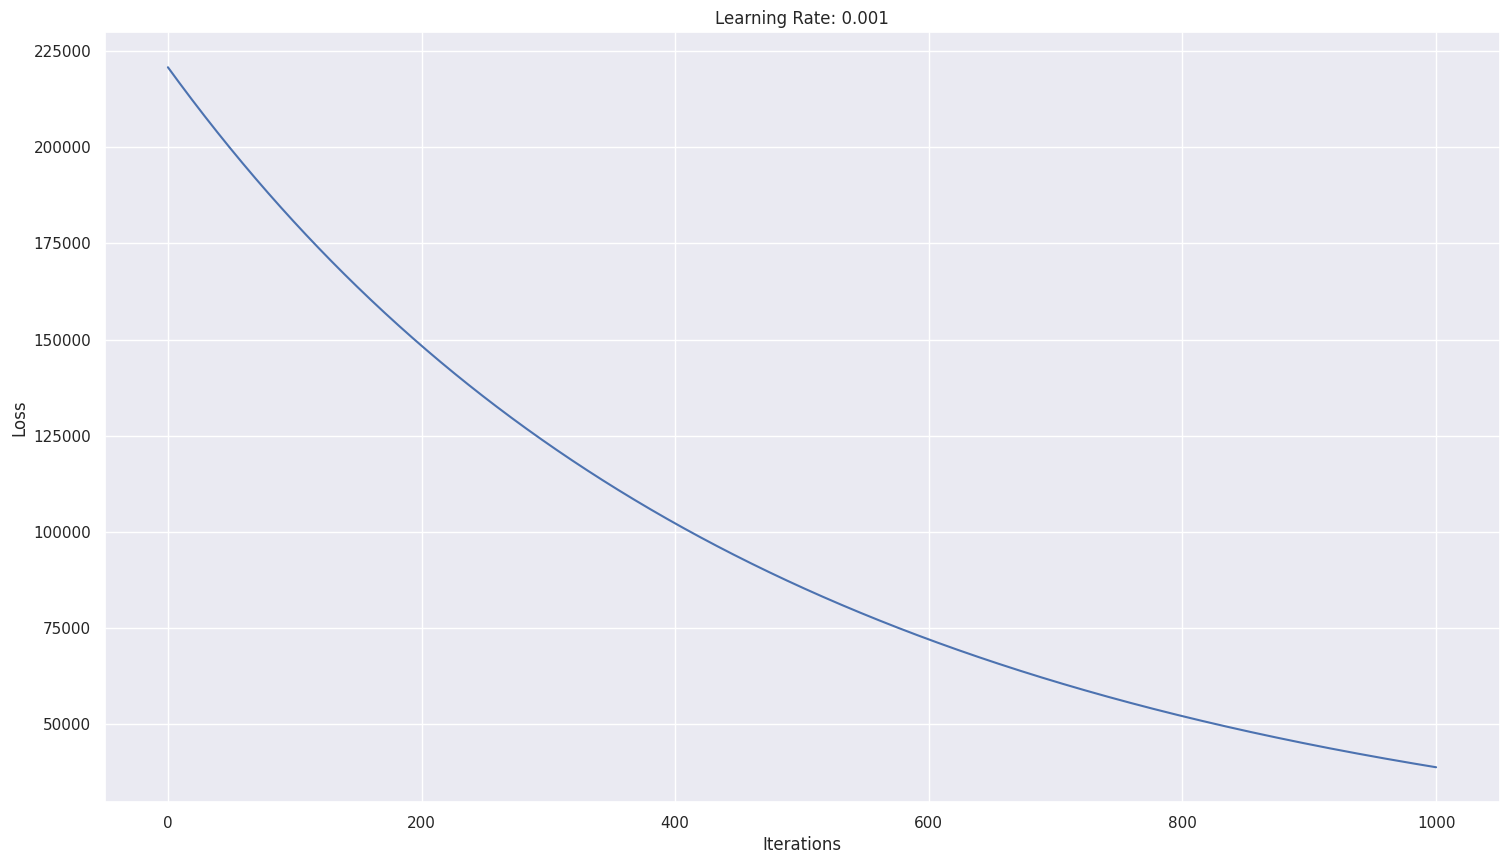

In [ ]:
# Loss vs Iteration Plots for different Learning Rates
# 0.1
linear_regressor = LinearRegression(learning_rate = 0.1, max_iterations = 1000)
linear_regressor.bestfit(X_train_scaled, np.array(Y_train))
Y_pred = linear_regressor.predict(X_test_scaled)

loss = list(linear_regressor.cost)
matplt.plot(loss)
matplt.xlabel("Iterations")
matplt.ylabel("Loss")
matplt.title("Learning Rate: 0.1")
matplt.show()

# 0.01
linear_regressor = LinearRegression(learning_rate = 0.01, max_iterations = 1000)
linear_regressor.bestfit(X_train_scaled, np.array(Y_train))
Y_pred = linear_regressor.predict(X_test_scaled)

loss = list(linear_regressor.cost)
matplt.plot(loss)
matplt.xlabel("Iterations")
matplt.ylabel("Loss")
matplt.title("Learning Rate: 0.01")
matplt.show()

# 0.001
linear_regressor = LinearRegression(learning_rate = 0.001, max_iterations = 1000)
linear_regressor.bestfit(X_train_scaled, np.array(Y_train))
Y_pred = linear_regressor.predict(X_test_scaled)

loss = list(linear_regressor.cost)
matplt.plot(loss)
matplt.xlabel("Iterations")
matplt.ylabel("Loss")
matplt.title("Learning Rate: 0.001")
matplt.show()

**Training Model with different parameters and Saving them on a txt file**

In [ ]:
# Train model with different constants and save the result
# Training Parameters
train_learning_rates = [0.001, 0.01, 0.1]
train_iterations = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
config_count = 1

# Training Results Arrays
mse_arr = []
rmse_arr = []
r2_arr = []
ev_arr = []

# Open Log File
log_file = open("logs_manual_implementation.txt","w")

for i in train_learning_rates:
    for j in train_iterations:
        # Learning Rate as i and the max_iterations as j
        linear_regressor = LinearRegression(learning_rate = i, max_iterations = j)
        linear_regressor.bestfit(X_train_scaled, np.array(Y_train))
        Y_pred = linear_regressor.predict(X_test_scaled)

        # Evaluate Performance
        mse = mean_squared_error(Y_test, Y_pred[0])
        rmse = np.sqrt(mse)
        r2 = r2_score(Y_test, Y_pred[0])
        ev = explained_variance_score(Y_test, Y_pred[0])

        # Store Results
        mse_arr.append(mse)
        rmse_arr.append(rmse)
        r2_arr.append(r2)
        ev_arr.append(ev)

        # Log Data
        log_file.write("Run: " + str(config_count) + " || MSE: " + str(mse) + " || R^2 Score: " + str(r2) + " || Explained Variance Score: " + str(ev) + " || Learning Rate: " + str(i) + "|| Iterations: " + str(j) + "\n")
        config_count += 1

best_param_idx = mse_arr.index(min(mse_arr))
print("\nEvaluation Parameters:\n")
print("Best Performance Results:")
print("MSE:", mse_arr[best_param_idx])
print("RMSE:", rmse_arr[best_param_idx])
print("R^2 Score:", r2_arr[best_param_idx])
print("Explained Variance Score: ", ev_arr[best_param_idx])

print("\nBest Parameters for Model Training:")
print("Learning Rate:", train_learning_rates[(best_param_idx % len(train_learning_rates))])
print("Iterations:", train_iterations[(best_param_idx % len(train_iterations))])

log_file.close()


Evaluation Parameters:

Best Performance Results:
MSE: 74.3695332178367
RMSE: 8.62377720131015
R^2 Score: 0.6115108900818473
Explained Variance Score:  0.6123510849060614

Best Parameters for Model Training:
Learning Rate: 0.01
Iterations: 100
